In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns


In [2]:
df=pd.read_csv("ford.csv")

<Axes: xlabel='price', ylabel='Count'>

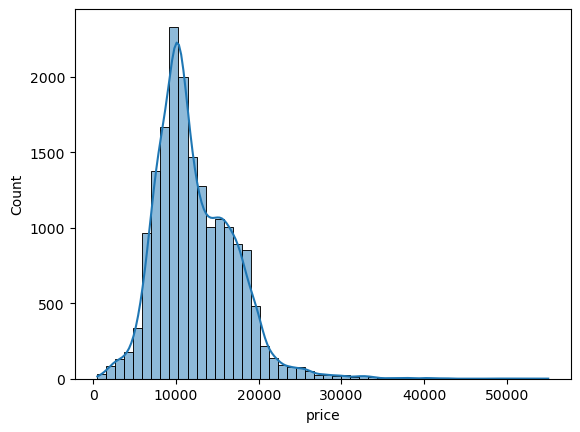

In [3]:
#EDA
sns.histplot(df['price'],bins=50,kde=True)

<Axes: >

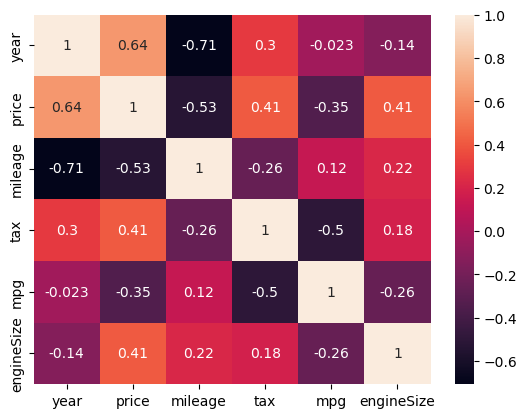

In [4]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='year', ylabel='price'>

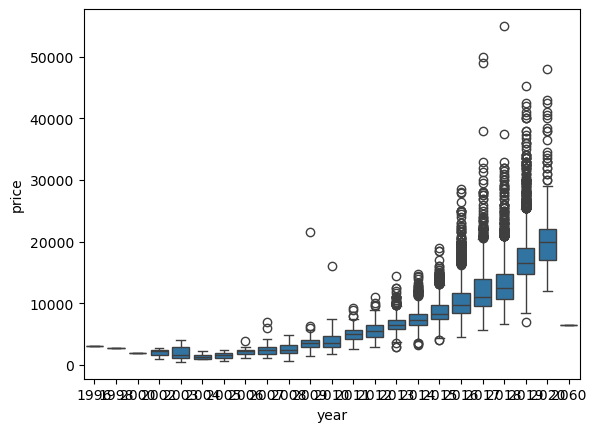

In [5]:
sns.boxplot(data=df,x='year',y='price')

<Axes: xlabel='mileage', ylabel='price'>

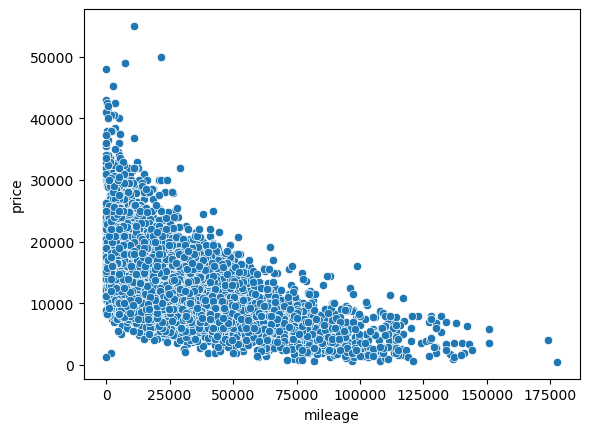

In [6]:
sns.scatterplot(data=df,x='mileage',y='price')

<Axes: xlabel='engineSize', ylabel='price'>

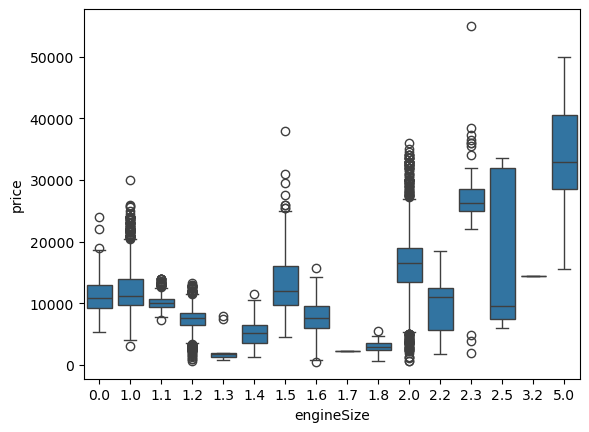

In [7]:
sns.boxplot(data=df,x='engineSize',y='price')

<Axes: xlabel='transmission', ylabel='price'>

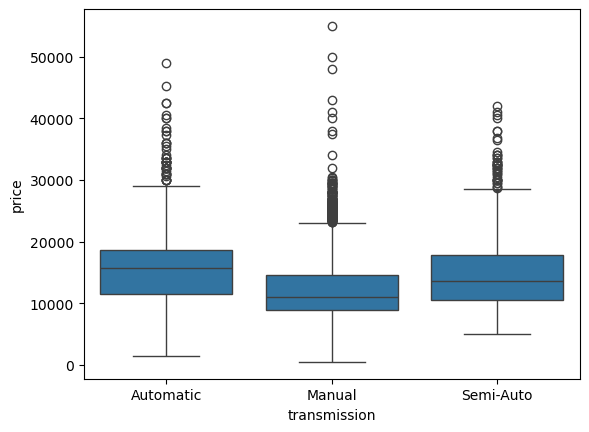

In [8]:
sns.boxplot(data=df,x='transmission',y='price')

<Axes: xlabel='fuelType', ylabel='price'>

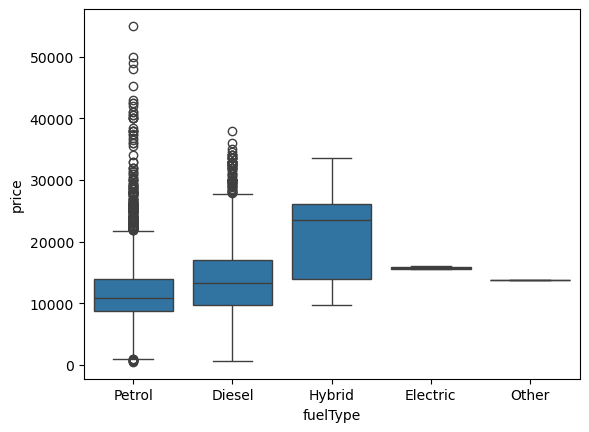

In [9]:
sns.boxplot(data=df,x='fuelType',y='price')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

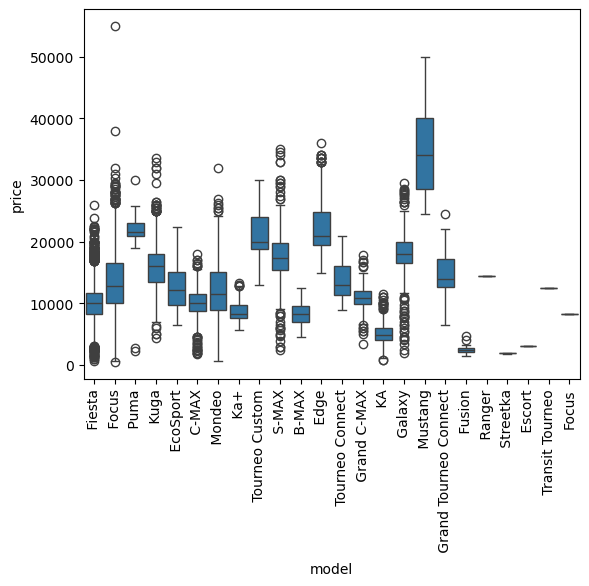

In [10]:
sns.boxplot(data=df,x='model',y='price')
plt.xticks(rotation=90)

<Axes: xlabel='tax', ylabel='price'>

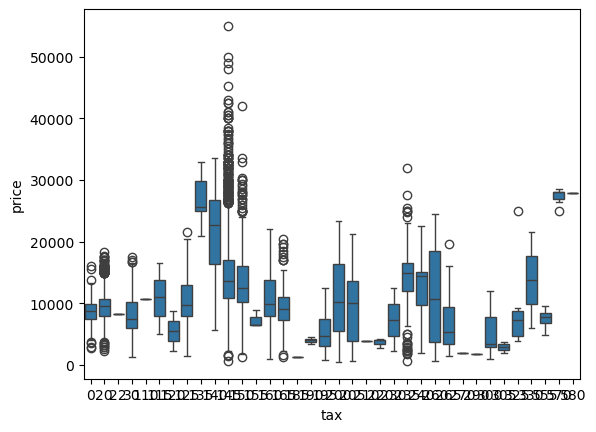

In [11]:
sns.boxplot(data=df,x='tax',y='price')

<Axes: xlabel='mpg', ylabel='price'>

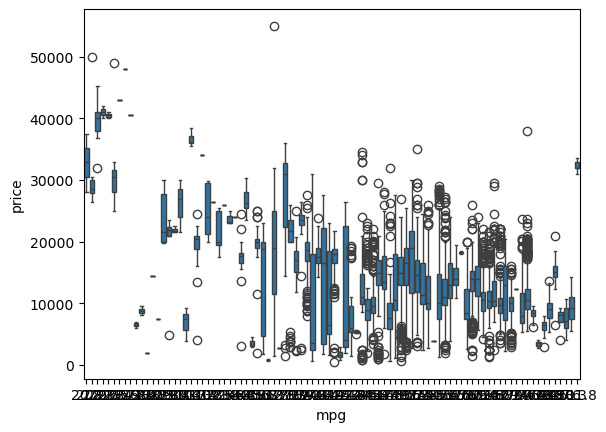

In [12]:
sns.boxplot(data=df,x='mpg',y='price')


In [13]:
X=df.drop(columns=['price'],axis=1)


In [14]:
y=df['price']

In [15]:
df.columns


Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [16]:
X_one_encode=pd.get_dummies(X,columns=['model','transmission','fuelType'],drop_first=True)


In [17]:
X_one_encode=X_one_encode.astype(int)



In [18]:
from sklearn.preprocessing import LabelEncoder

cols = ['model', 'transmission', 'fuelType']

# Strip leading/trailing spaces and make a copy
X_label = X.copy()
for col in cols:
    X_label[col] = X_label[col].astype(str).str.strip()

# Apply LabelEncoder
label_encoders = {}
for col in cols:
    le = LabelEncoder()
    X_label[col] = le.fit_transform(X_label[col])
    label_encoders[col] = le

# Check unique values after encoding
for col in cols:
    print(f"{col} unique values:", X_label[col].nunique())


model unique values: 23
transmission unique values: 3
fuelType unique values: 5


In [19]:
from sklearn.preprocessing import StandardScaler
numerial_cols=['year','mileage','tax','mpg','engineSize']
scaler=StandardScaler()

In [20]:
X_one_encode[numerial_cols]=scaler.fit_transform(X_one_encode[numerial_cols])


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460671,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211336,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211336,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460671,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460671,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [101]:
#Training model with oneHotEncoding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_one_encode, y, test_size=0.33, random_state=42)

In [61]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [67]:
y_pred=model.predict(X_test)
y_pred

array([ 6888.75487917,  9328.62297666,  9420.53085767, ...,
       19099.96373064,  4948.44438264, 10424.59544226])

In [69]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [71]:
r2=r2_score(y_test,y_pred)
r2

0.8396626991294073

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [103]:
#Training model with label encoding 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X_label, y, test_size=0.33, random_state=42)


scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
print(y_pred)  
r2=r2_score(y_test,y_pred)
r2


[ 6158.08857412  9286.53322923  9519.53006154 ... 19580.89396649
  7382.98318239  9960.16716707]


0.7310239287853537